In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload

%autoreload 2

In [2]:
df = pd.read_pickle('../data/raw/model_df.pkl')

In [4]:
import os
import sys

sys.path.append('/'.join(os.getcwd().split('/')[:-1]) + '/src/')
#sys.path.append('/'.join(os.getcwd().split('/')[:-1]) + '/src/')

from data import expand_dicts
from features import build_features

In [5]:
df = expand_dicts.expand_dict_and_join(df, 'modeler_response')
df = expand_dicts.expand_dict_and_join(df, 'modeler_ratings')

In [7]:
def convert_to_float(o):
    
    if isinstance(o, str):
        o = float(o[:-1])
    elif isinstance(o, int):
        o = float(o)
    return o

In [8]:
df.loc[:, 'time'] = df.time.apply(lambda x: convert_to_float(x))

In [15]:
df[df.quantile([.1])

,views,likes,review_count,pic_count,price_usd,tag_count,response_time,percent,time,avg_rating,num_rating
0.1,26.0,0.0,0.0,2.0,4.75,8.0,0.0,0.0,0.0,0.0,0.0


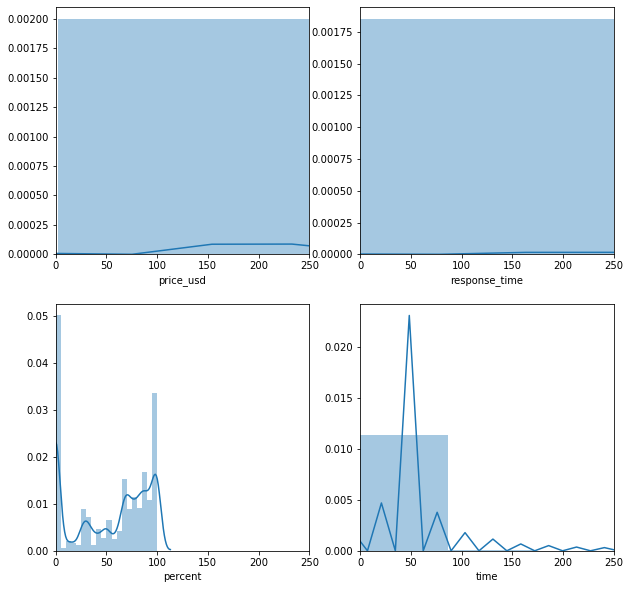

In [22]:
import seaborn as sns

fig, axs = plt.subplots(2,2, figsize=(10,10))

dist_cols = ['price_usd', 'response_time', 'percent', 'time']

for col, ax in zip(dist_cols, axs.flatten()):
    sns.distplot(df[col], ax=ax, bins=20)
    ax.set_xlim(0, 250)
    #ax.set_title(col)